In [1]:
#!/usr/bin/python
# _*_ coding:utf-8 _*_



from IPython.core.display import HTML
hide_code = HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value=".."></form>''')




from elasticsearch import Elasticsearch, helpers
import pandas as pd
import csv
from pprint import pprint # Json 출력 인덴트 주어 보기 편하게 출력.
import pandas as pd # 데이터프레임 가공을 위한 라이브러리.
import numpy as np # 데이터프레임 가공을 위한 라이브러리.
import psycopg2 # 데이터베이스 연동을 위한 라이브러리.
import time
import pymysql
import re
import random

from random import randrange # 시간 관련 라이브러리.
from datetime import timedelta # 시간 관련 라이브러리.
from datetime import datetime # 시간 관련 라이브러리.

import seaborn as sns # 시각화 관련 라이브러리.
import matplotlib.pyplot as plt

import matplotlib.dates as mdates # datetime 포멧 관련 라이브러리.
# !pip install squarify
import squarify





import warnings
plt.rcParams['figure.figsize']=[10,8]
sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

# 한글이 깨지는 경우 
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False 






import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = '/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicCoding.ttf'
# font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
fprop = fm.FontProperties(fname=font_location)






# !pip install folium
import folium as g # 좌표 시각화 위한 라이브러리.
import json





# 딥러닝 라이브러리.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install tensorflow
import tensorflow as ts
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# 머신러닝 라이브러리.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier






# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_seq_items', None)
# Default
pd.options.display.max_rows = 60
pd.options.display.max_columns = 20





# db_p = psycopg2.connect(host='192.168.1.222', dbname='omop',user='belab',password='qwer1234',port=5433) # 파이썬 db 연동.
# db_m = pymysql.connect(
#     user='belabmunjin', 
#     passwd='djeldkvkanswls123',
#     port=3306,
#     host='bepluslab.coiunyx8rpkt.ap-northeast-2.rds.amazonaws.com', 
#     db='BEPLUSLAB', 
#     charset='utf8mb4'
# )
# es = Elasticsearch("192.168.1.222:9200")






dummy_df = pd.read_csv("./diagnosis_tf_dummy_10000_202112101609.csv", encoding = 'euc-kr')
dummy_result_df = pd.read_csv("./diagnosis_tf_dummy_10000_result_202112101609.csv", encoding = 'euc-kr')








# db_m.close()

In [2]:
hide_code

# Simple statistics for EDA
* <b>10,000</b>명의 더미 데이터 추출.
* 조건 1. 10개 증상(<b>복부 종괴, 가슴통증, 기침, 설사, 어지러움, 호흡곤란, 코피, 안면마비, 피가래, 혈변</b>) 대상.
* 조건 2. 연령(0~100), 성별(남/여)별 질문지 구분.

<br>
<br>
<br>
<br>
<br>

## 최다 질환 및 증상

In [3]:
disease_5 = pd.DataFrame(dummy_result_df.groupby('disease_name').size().sort_values(ascending = False))
disease_5.columns = ['user_cnt']
disease_5.reset_index(inplace = True)
disease_5['ratio(%)'] = disease_5['user_cnt'].apply(lambda x : x / disease_5['user_cnt'].sum() * 100)
v_disease_5 = disease_5.head()

In [4]:
value_sum = disease_5[(disease_5['disease_name'] != '뇌졸중') &
         (disease_5['disease_name'] != '염증성 장질환') &
         (disease_5['disease_name'] != '대장암') &
         (disease_5['disease_name'] != '폐렴') &
         (disease_5['disease_name'] != '외상으로 인한 코피')]['user_cnt'].sum()
value_ratio = disease_5[(disease_5['disease_name'] != '뇌졸중') &
         (disease_5['disease_name'] != '염증성 장질환') &
         (disease_5['disease_name'] != '대장암') &
         (disease_5['disease_name'] != '폐렴') &
         (disease_5['disease_name'] != '외상으로 인한 코피')]['ratio(%)'].sum()
value_insert = {'disease_name': '그 외', 'user_cnt': value_sum, 'ratio(%)': value_ratio}
v_disease_5 = v_disease_5.append(value_insert, ignore_index=True)

In [5]:
symptom_5 = pd.DataFrame(dummy_result_df.groupby('symptom').size().sort_values(ascending = False))
symptom_5.columns = ['user_cnt']
symptom_5.reset_index(inplace = True)
symptom_5['ratio(%)'] = disease_5['user_cnt'].apply(lambda x : x / disease_5['user_cnt'].sum() * 100)
v_symptom_5 = symptom_5.head()

In [6]:
value_sum2 = symptom_5[(symptom_5['symptom'] != '혈변') &
         (symptom_5['symptom'] != '가슴통증') &
         (symptom_5['symptom'] != '어지러움') &
         (symptom_5['symptom'] != '설사') &
         (symptom_5['symptom'] != '코피')]['user_cnt'].sum()
value_ratio2 = symptom_5[(symptom_5['symptom'] != '혈변') &
         (symptom_5['symptom'] != '가슴통증') &
         (symptom_5['symptom'] != '어지러움') &
         (symptom_5['symptom'] != '설사') &
         (symptom_5['symptom'] != '코피')]['ratio(%)'].sum()
value_insert2 = {'symptom': '그 외', 'user_cnt': value_sum2, 'ratio(%)': value_ratio2}
v_symptom_5 = v_symptom_5.append(value_insert2, ignore_index=True)

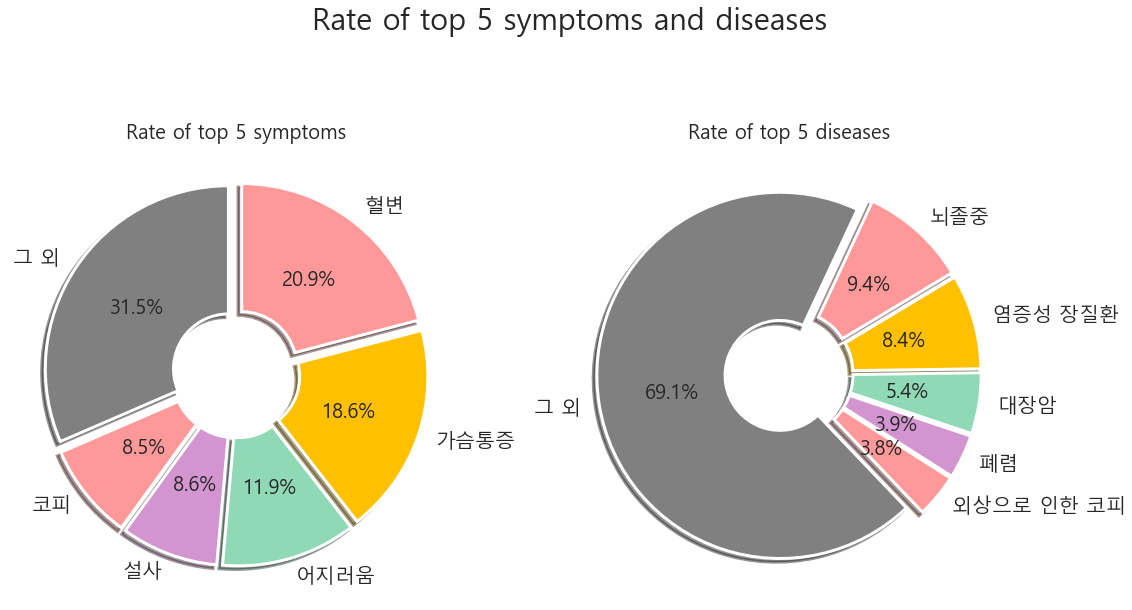

In [7]:
fig3 = plt.figure(figsize=(16, 10))
ax5 = fig3.add_subplot(1,2,2)
plt.pie(v_disease_5['ratio(%)'], # 비율 값
        labels=v_disease_5['disease_name'], # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=65, # 축이 시작되는 각도 설정
        counterclock=False, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05,0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#ff9999', '#808080'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
        textprops={'fontsize': 20}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax5.set_title('Rate of top 5 diseases', fontsize=20)

ax6 = fig3.add_subplot(1,2,1)
plt.pie(v_symptom_5['ratio(%)'], # 비율 값
        labels=v_symptom_5['symptom'], # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=False, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05,0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#ff9999', '#808080'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
        textprops={'fontsize': 20}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax6.set_title('Rate of top 5 symptoms', fontsize=20)
fig3.suptitle('Rate of top 5 symptoms and diseases', fontsize=30)
fig3.tight_layout()
plt.show()

* 어디아파 이용자들의 호소 <b>증상</b>과 예측 <b>질환</b>에서의 상위 5개 항목
    > 상위 5개 증상 : 혈변, 가슴통증, 어지러움, 설사, 코피  
    > 상위 5개 질환 : 뇌졸중, 염증성 장질환, 대장암, 폐렴, 외상으로 인한 코피

<br>
<br>
<br>
<br>
<br>

## 상위 4개 증상별 질환 비율

In [8]:
symptom_5_disease = pd.DataFrame(dummy_result_df[(dummy_result_df['symptom'] == '혈변') |
                (dummy_result_df['symptom'] == '가슴통증') |
                (dummy_result_df['symptom'] == '어지러움') |
                (dummy_result_df['symptom'] == '설사') |
                (dummy_result_df['symptom'] == '코피')].groupby(['symptom', 'disease_name']).size()).reset_index()
symptom_5_disease.columns = ['symptom', 'disease_name', 'user_cnt']
symptom_5_disease_A = symptom_5_disease.groupby(['symptom', 'disease_name'])['user_cnt'].sum()
symptom_5_disease_B = symptom_5_disease.groupby(['symptom'])['user_cnt'].sum()
symptom_5_disease['ratio(%)'] = pd.DataFrame(symptom_5_disease_A/symptom_5_disease_B*100).reset_index()['user_cnt']
symptom_5_disease = symptom_5_disease.sort_values(by=['symptom', 'user_cnt'], ascending=False).reset_index(drop=True)

In [9]:
v_symptom_5_disease_1 = symptom_5_disease[symptom_5_disease['symptom']=='혈변'].head(5)
v_symptom_5_disease_1_value = symptom_5_disease.iloc[5:,:]['user_cnt'].sum()
v_symptom_5_disease_1_ratio = symptom_5_disease.iloc[5:,:]['ratio(%)'].sum()
v_symptom_5_disease_1_insert = {'symptom': '혈변', 'disease_name' : '그 외', 'user_cnt': v_symptom_5_disease_1_value, 'ratio(%)': v_symptom_5_disease_1_ratio}
v_symptom_5_disease_1 = v_symptom_5_disease_1.append(v_symptom_5_disease_1_insert, ignore_index=True)

In [10]:
v_symptom_5_disease_2 = symptom_5_disease[symptom_5_disease['symptom']=='가슴통증'].head(5)
v_symptom_5_disease_2_value = symptom_5_disease.iloc[5:,:]['user_cnt'].sum()
v_symptom_5_disease_2_ratio = symptom_5_disease.iloc[5:,:]['ratio(%)'].sum()
v_symptom_5_disease_2_insert = {'symptom': '가슴통증', 'disease_name' : '그 외', 'user_cnt': v_symptom_5_disease_2_value, 'ratio(%)': v_symptom_5_disease_2_ratio}
v_symptom_5_disease_2 = v_symptom_5_disease_2.append(v_symptom_5_disease_2_insert, ignore_index=True)

In [11]:
v_symptom_5_disease_3 = symptom_5_disease[symptom_5_disease['symptom']=='어지러움'].head(5)
v_symptom_5_disease_3_value = symptom_5_disease.iloc[5:,:]['user_cnt'].sum()
v_symptom_5_disease_3_ratio = symptom_5_disease.iloc[5:,:]['ratio(%)'].sum()
v_symptom_5_disease_3_insert = {'symptom': '어지러움', 'disease_name' : '그 외', 'user_cnt': v_symptom_5_disease_3_value, 'ratio(%)': v_symptom_5_disease_3_ratio}
v_symptom_5_disease_3 = v_symptom_5_disease_3.append(v_symptom_5_disease_3_insert, ignore_index=True)

In [12]:
v_symptom_5_disease_4 = symptom_5_disease[symptom_5_disease['symptom']=='설사'].head(5)
v_symptom_5_disease_4_value = symptom_5_disease.iloc[5:,:]['user_cnt'].sum()
v_symptom_5_disease_4_ratio = symptom_5_disease.iloc[5:,:]['ratio(%)'].sum()
v_symptom_5_disease_4_insert = {'symptom': '설사', 'disease_name' : '그 외', 'user_cnt': v_symptom_5_disease_4_value, 'ratio(%)': v_symptom_5_disease_4_ratio}
v_symptom_5_disease_4 = v_symptom_5_disease_4.append(v_symptom_5_disease_4_insert, ignore_index=True)

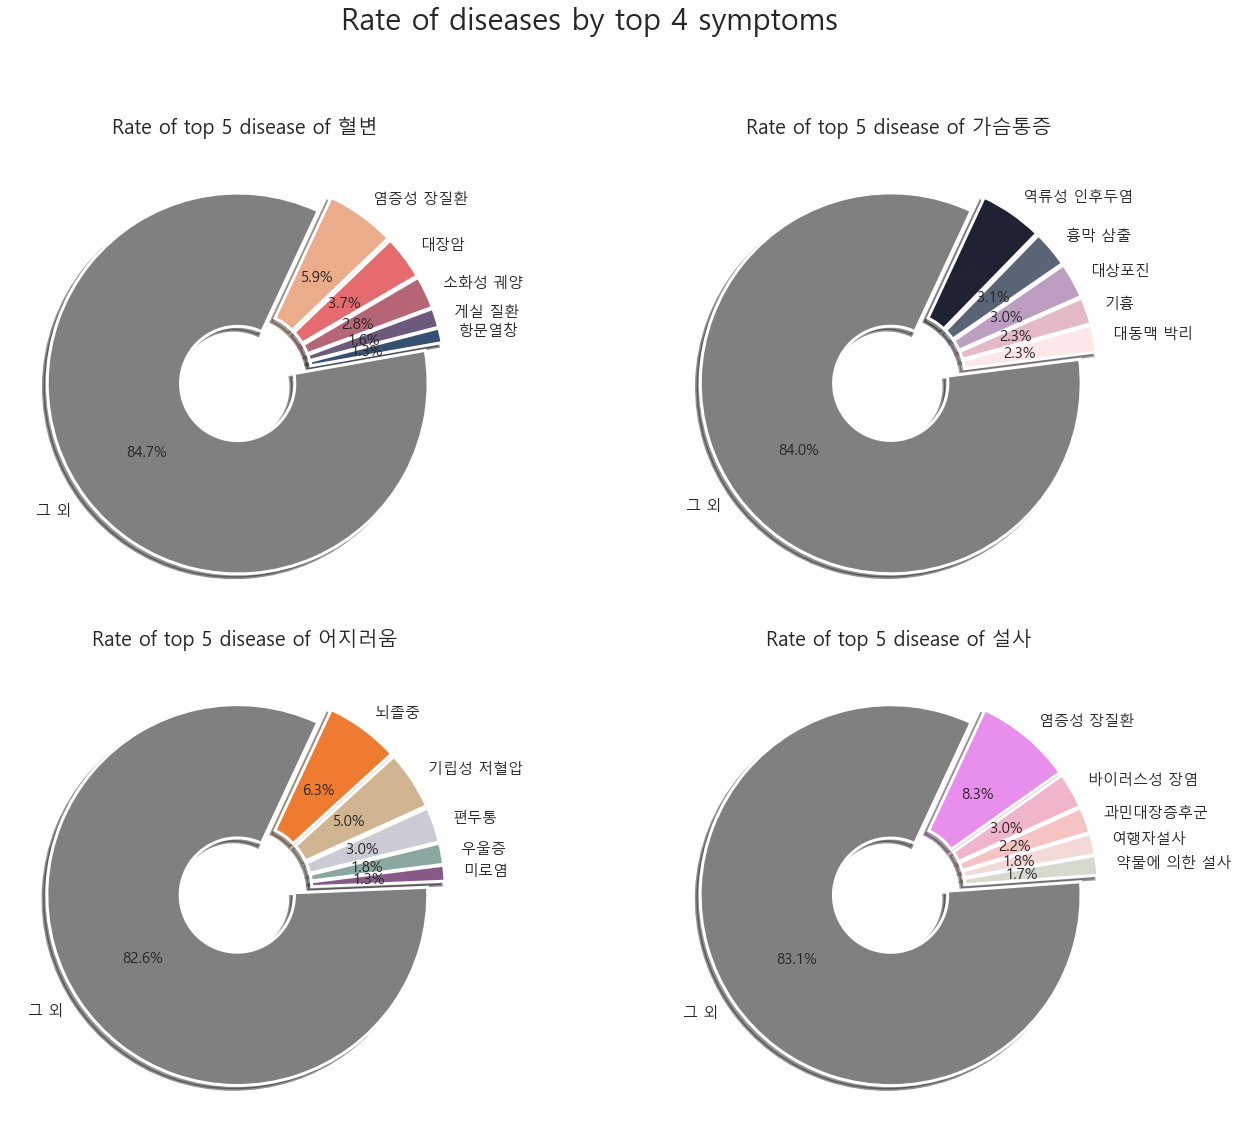

In [13]:
fig4 = plt.figure(figsize=(20, 15))
ax5 = fig4.add_subplot(2,2,1)
plt.pie(v_symptom_5_disease_1['ratio(%)'], # 비율 값
        labels=v_symptom_5_disease_1['disease_name'], # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=65, # 축이 시작되는 각도 설정
        counterclock=False, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05,0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#EAAC8B', '#E56B6F', '#B56576', '#6D597A','#355070', '#808080'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
        textprops={'fontsize': 15}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax5.set_title('Rate of top 5 disease of 혈변', fontsize=20)

ax6 = fig4.add_subplot(2,2,2)
plt.pie(v_symptom_5_disease_2['ratio(%)'], # 비율 값
        labels=v_symptom_5_disease_2['disease_name'], # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=65, # 축이 시작되는 각도 설정
        counterclock=False, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05,0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#1F2232', '#596475', '#BC9EC1', '#E3BAC6','#FDE8E9', '#808080'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
        textprops={'fontsize': 15}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax6.set_title('Rate of top 5 disease of 가슴통증', fontsize=20)

ax7 = fig4.add_subplot(2,2,3)
plt.pie(v_symptom_5_disease_3['ratio(%)'], # 비율 값
        labels=v_symptom_5_disease_3['disease_name'], # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=65, # 축이 시작되는 각도 설정
        counterclock=False, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05,0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#EE7B30', '#D1B490', '#CBCBD4', '#8AA8A1','#885A89', '#808080'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
        textprops={'fontsize': 15}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax7.set_title('Rate of top 5 disease of 어지러움', fontsize=20)

ax8 = fig4.add_subplot(2,2,4)
plt.pie(v_symptom_5_disease_4['ratio(%)'], # 비율 값
        labels=v_symptom_5_disease_4['disease_name'], # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=65, # 축이 시작되는 각도 설정
        counterclock=False, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05,0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#E88EED', '#F1B5CB', '#F4C3C2', '#F3DAD8','#D6D9CE', '#808080'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3},
        textprops={'fontsize': 15}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax8.set_title('Rate of top 5 disease of 설사', fontsize=20)


fig4.suptitle('Rate of diseases by top 4 symptoms', fontsize=30, position=(0.5, 1.0+0.05))
fig4.tight_layout()
plt.show()

* 상위 4개 증상(혈변, 가슴통증, 어지러움, 설사) 각각의 <b>예측 질환 비율</b>.
> 혈변 증상에서는 <b>염증성 장질환</b>,  
> 가슴통증 증상에서는 <b>역류성 인후두염</b>,  
> 어지러움 증상에서는 <b>뇌졸중</b>,  
> 설사 증상에서는 <b>염증성 장질환</b>이 최다 예측 질환으로 나타남.

<br>
<br>
<br>
<br>
<br>

## 동반 증상

In [14]:
Y4 = pd.DataFrame(dummy_df[(dummy_df['symptom']=='어지러움') & (dummy_df['pheno_name']!='어지러움') & (dummy_df['pheno_name']!='약 복용') & (dummy_df['pheno_name']!='특별한 이유없이')].groupby('pheno_name').size()).reset_index()
Y4.columns = ['pheno_name', 'cnt']
Y4 = Y4.sort_values('cnt', ascending=False)
Y4 = Y4.reset_index(drop=True)

<AxesSubplot:title={'center':'Accompanying symptoms of Dizziness'}>

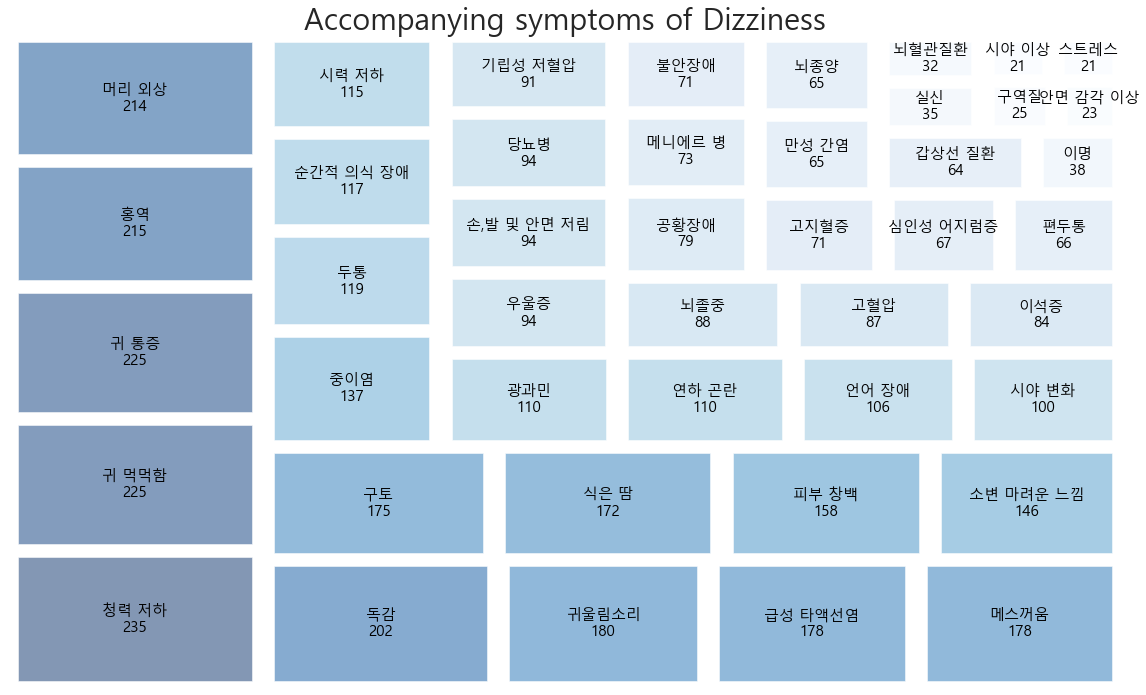

In [15]:
import matplotlib
cmap = plt.cm.Blues
mini=min(Y4['cnt'])
maxi=max(Y4['cnt'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in Y4['cnt']]

plt.figure(figsize=(20,12))
plt.title('Accompanying symptoms of Dizziness', size=30, position=(0.5, 1.0+0.05))
plt.axis('off')
squarify.plot(sizes=Y4['cnt'], color=colors,label = Y4['pheno_name'], value = Y4['cnt'], alpha=0.5, text_kwargs={'color':'black', 'size':15}, pad=True)

* <b>어지러움</b> 증상에서의 <b>동반 증상</b> 분포

> 청력 저하, 귀 먹먹함, 귀 통증 등이 어지러움 증상과 주로 동반되는 것을 볼 수 있음.

In [16]:
Y5 = pd.DataFrame(dummy_df[(dummy_df['symptom']=='혈변') & (dummy_df['pheno_name']!='혈변') & (dummy_df['pheno_name']!='약 복용') & (dummy_df['pheno_name']!='특별한 이유없이') & (dummy_df['pheno_name']!='대장내시경') & (dummy_df['pheno_name']!='상한 음식 섭취') & (dummy_df['pheno_name']!='해외여행')].groupby('pheno_name').size()).reset_index()
Y5.columns = ['pheno_name', 'cnt']
Y5 = Y5.sort_values('cnt', ascending=False)
Y5 = Y5.reset_index(drop=True)

<AxesSubplot:title={'center':'Accompanying symptoms of hematochezia'}>

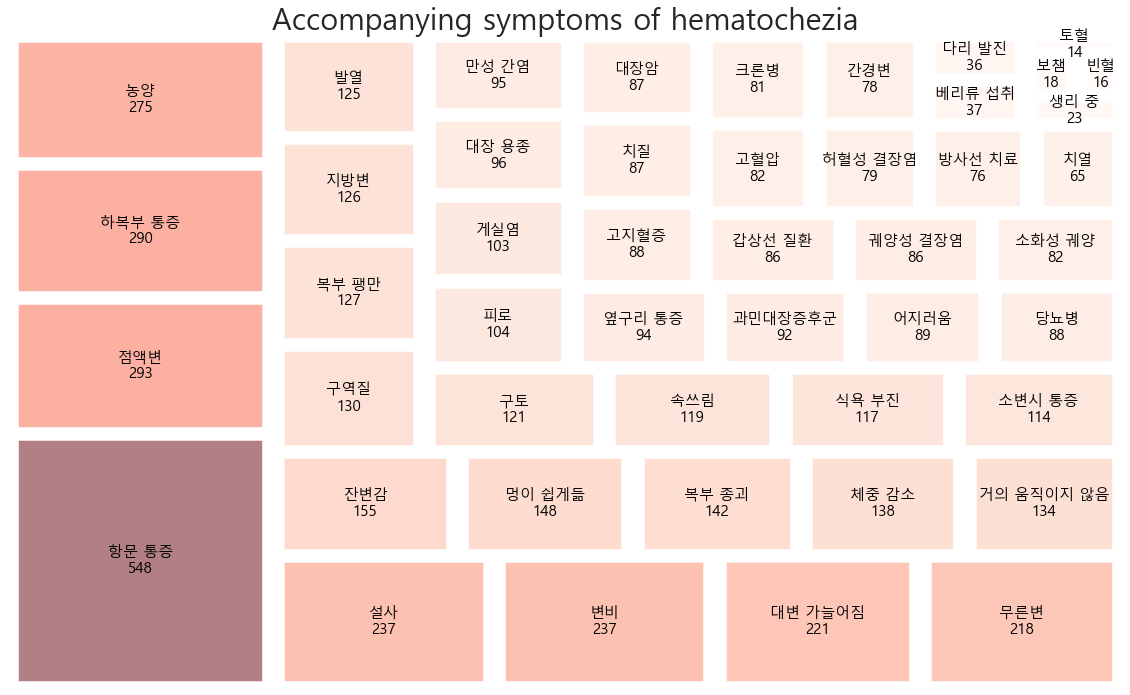

In [17]:
import matplotlib
cmap = plt.cm.Reds
mini=min(Y5['cnt'])
maxi=max(Y5['cnt'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in Y5['cnt']]

plt.figure(figsize=(20,12))
plt.title('Accompanying symptoms of hematochezia', size=30, position=(0.5, 1.0+0.05))
plt.axis('off')
squarify.plot(sizes=Y5['cnt'], color=colors,label = Y5['pheno_name'], value = Y5['cnt'], alpha=0.5, text_kwargs={'color':'black', 'size':15}, pad=True)

* <b>혈변</b> 증상에서의 <b>동반 증상</b> 분포
> 항문 통증, 점액변, 하복부 통증 등이 혈변 증상과 주로 동반되는 것을 볼 수 있음.

<br>
<br>
<br>
<br>
<br>

## 고혈압/흡연 여부에 따른 증상/질환 차이

In [18]:
random.seed(12)
dummy_result_df = dummy_result_df[['user_id', 'symptom', 'disease', 'disease_name']]
dummy_result_df['HBP'] = 0
dummy_result_df['HBP'] = dummy_result_df['HBP'].apply(lambda x : random.randrange(0,3))
dummy_result_df['HBP'] = dummy_result_df['HBP'].apply(lambda x : 0 if x == 1 else x)
J3 = pd.DataFrame(dummy_result_df[(dummy_result_df['symptom']=='가슴통증')].groupby('HBP').size()).reset_index()
J3['HBP'] = J3['HBP'].apply(lambda x : '고혈압' if x == 0 else '정상 혈압')
J3.columns = ['HBP', 'user_cnt']

In [19]:
J3_2 = dummy_result_df.groupby('HBP').size().reset_index()
J3_2['HBP'] = J3_2['HBP'].apply(lambda x : '고혈압' if x == 0 else '정상 혈압')
J3_2.columns = ['HBP', 'user_cnt']

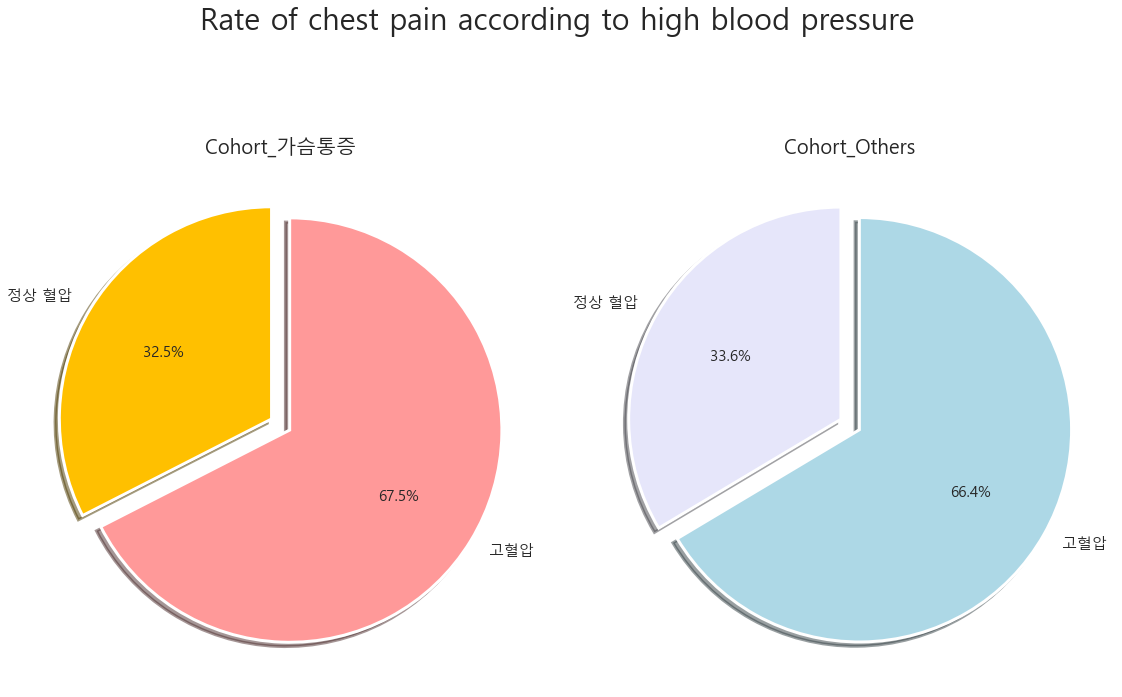

In [20]:
fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(1,2,1)
plt.pie(J3['user_cnt'], # 비율 값
        labels=J3['HBP'], # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=False, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#ff9999', '#ffc000'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'edgecolor':'w','linewidth':3},
        textprops={'fontsize': 15}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax1.set_title('Cohort_가슴통증', fontsize=20)

ax2 = fig.add_subplot(1,2,2)
plt.pie(J3_2['user_cnt'], # 비율 값
        labels=J3_2['HBP'], # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=False, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#add8e6', '#e6e6fa'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'edgecolor':'w','linewidth':3},
        textprops={'fontsize': 15}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax2.set_title('Cohort_Others', fontsize=20)
fig.suptitle('Rate of chest pain according to high blood pressure', fontsize=30, position=(0.5, 1.0+0.05))
fig.tight_layout()
plt.show()

* <b>고혈압 여부</b>에 따른 이용자 분포
> 좌측은 가슴통증 증상 호소자들의 고혈압 여부에 따른 비율을,  
> 우측은 그외 이용자들의 비율을 나타내며,  
> 가슴통증 증상을 호소하는 경우에서 고혈압 비율이 <b>약 1.1%</b> 더 높은 것을 볼 수 있다.

In [21]:
random.seed(20)
dummy_result_df['smoking'] = 0
dummy_result_df['smoking'] = dummy_result_df['smoking'].apply(lambda x : random.randrange(0,3))
dummy_result_df['smoking'] = dummy_result_df['smoking'].apply(lambda x : 2 if x == 1 else x)
J1 = pd.DataFrame(dummy_result_df[(dummy_result_df['disease_name']=='대장암')].groupby('smoking').size()).reset_index()
J1.columns = ['smoking', 'user_cnt']
J1['smoking'] = J1['smoking'].apply(lambda x : '비흡연' if x == 0 else '흡연')
J1 = J1.sort_values('user_cnt', ascending=False)

In [22]:
J1_2 =dummy_result_df.groupby('smoking').size().reset_index()
J1_2.columns = ['smoking', 'user_cnt']
J1_2['smoking'] = J1['smoking'].apply(lambda x : '비흡연' if x == 0 else '흡연')
J1_2 = J1_2.sort_values('user_cnt', ascending=False)

<br>
<br>
<br>
<br>
<br>

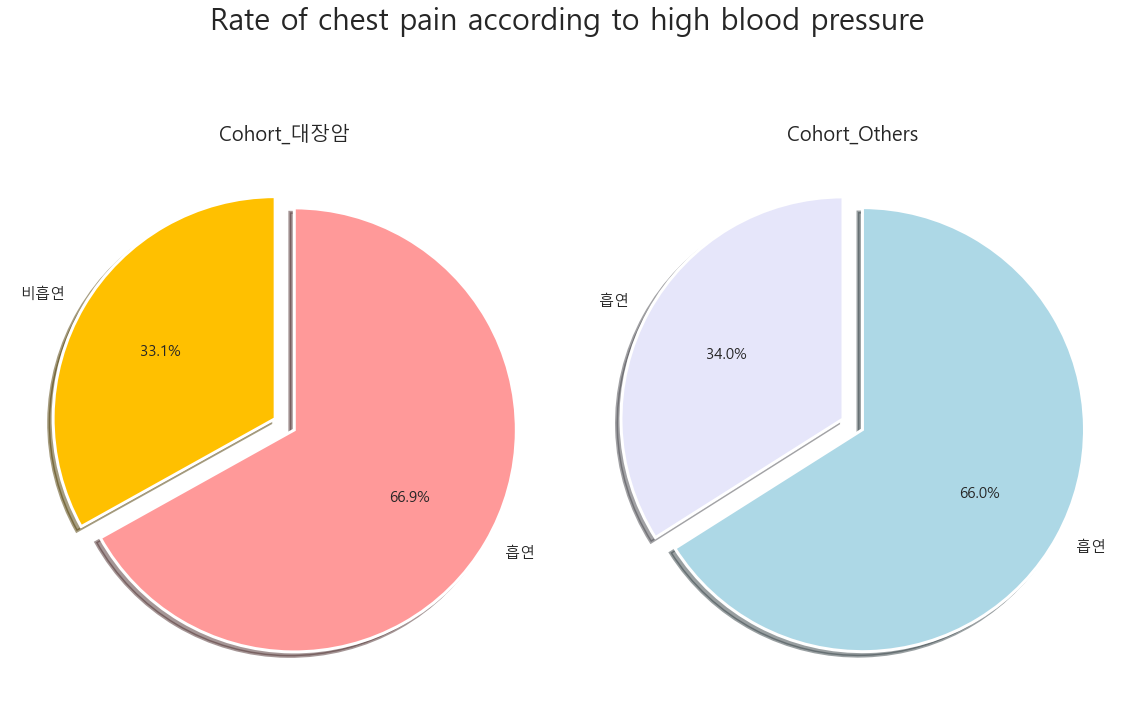

In [23]:
fig2 = plt.figure(figsize=(16, 10))
ax3 = fig2.add_subplot(1,2,1)
plt.pie(J1['user_cnt'], # 비율 값
        labels=J1['smoking'], # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=False, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#ff9999', '#ffc000'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'edgecolor':'w','linewidth':3},
        textprops={'fontsize': 15}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax3.set_title('Cohort_대장암', fontsize=20)

ax4 = fig2.add_subplot(1,2,2)
plt.pie(J1_2['user_cnt'], # 비율 값
        labels=J1_2['smoking'], # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=False, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#add8e6', '#e6e6fa'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'edgecolor':'w','linewidth':3},
        textprops={'fontsize': 15}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax4.set_title('Cohort_Others', fontsize=20)
fig2.suptitle('Rate of chest pain according to high blood pressure', fontsize=30, position=(0.5, 1.0+0.05))
fig2.tight_layout()

plt.show()

* <b>흡연 여부</b>에 따른 이용자 분포
> 좌측은 대장암이 예측 질환으로 나타난 이용자들의 흡연 여부에 따른 비율을,  
> 우측은 그외 이용자들의 비율을 나타내며,  
> 예측 질환이 대장암인 경우에서 흡연 비율이 <b>약 0.9%</b> 더 높은 것을 볼 수 있다.

<br>
<br>
<br>
<br>
<br>

In [24]:
J2 = dummy_result_df.groupby(['smoking','disease_name']).size().reset_index()
J2.columns = ['smoking', 'disease_name', 'user_cnt']
J2 = J2.sort_values('user_cnt', ascending=False)[J2['user_cnt']>100]
# J2.head(10) # 뇌졸중, 염증성 장질환, 대장암, 폐렴, 역류성 인후두염

In [25]:
J2 = dummy_result_df.iloc[:,:]
J2['smoking'] = J2['smoking'].apply(lambda x : '비흡연' if x == 0 else '흡연')
J2['disease_name'] = J2['disease_name'].apply(lambda x : '기타' if x != '뇌졸중' and x != '염증성 장질환' and x != '대장암' and x != '폐렴' and x != '역류성 인후두염' else x)

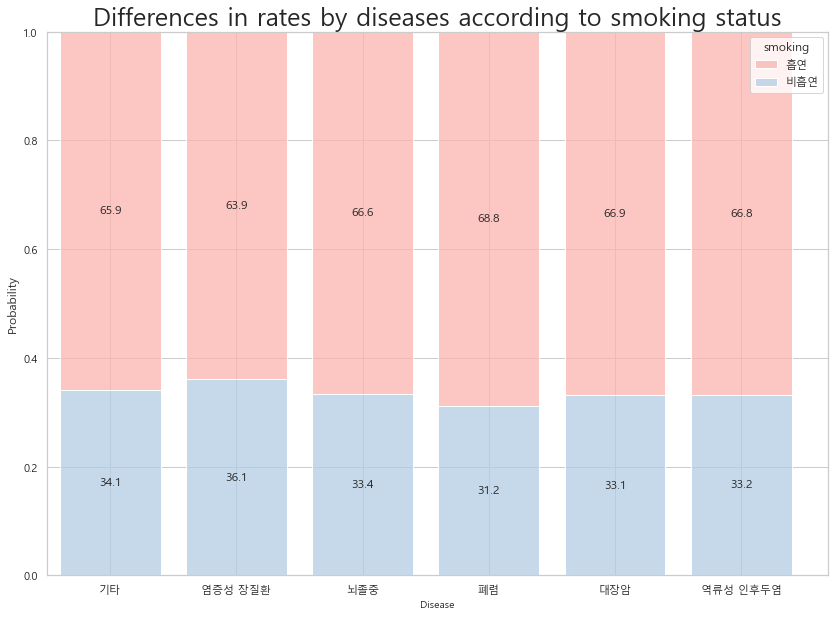

In [26]:
fig6 = plt.figure(figsize=(14, 10))
ax = sns.histplot(data=J2,
             x='disease_name',
             hue='smoking',
             stat='probability',
             multiple='fill',
             shrink=0.8,
             color='#ffc000',
             palette='Pastel1')
ax.set_title("Differences in rates by diseases according to smoking status",fontsize=25, position=(0.5, 1.0+0.05))
ax.set_xlabel("Disease", fontsize=10)

for p in ax.patches :
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2), ha ='center', va='center')

* 각 예측 질환에서의 <b>흡연/비흡연</b> 비율
> <b>염증성 장질환</b>에서 흡연자 비율이 다른 경우보다 더 <b>약 2%</b> 더 높은 것을 볼 수 있다.

<br>
<br>
<br>
<br>
<br>

## 서울특별시 자치구별 이용자 분포

In [27]:
dummy_result_df['x'] = 0
dummy_result_df['y'] = 0
ex_data = pd.read_csv("./공공자전거.csv", encoding='euc-kr')
dummy_result_df['x'] = ex_data['위도']
dummy_result_df['y'] = ex_data['경도']
dummy_result_df.to_csv("./dummy_geo.csv", encoding='euc-kr')

cnt_point = pd.read_csv("./구별 이용자수2.csv", encoding='euc-kr')

In [28]:
Y2 = cnt_point[['SIG_KOR_NM', 'NUMPOINTS', 'xcoord', 'ycoord']]
Y2 = Y2.sort_values('NUMPOINTS', ascending=False)

In [29]:
geo_data = './test4.geojson'
geo_data = json.load(open(geo_data, encoding='utf-8'))

In [30]:
# 서울시 중심부의 위도, 경도 입니다.
center = [37.571, 126.986]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = g.Map(location=center, zoom_start=10.5, tiles='cartodbpositron')

# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
g.Choropleth(
    geo_data=geo_data,
    data=Y2,
    columns=('SIG_KOR_NM', 'NUMPOINTS'),
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='어디아파 이용자 수').add_to(m)

# 맵 m을 출력합니다.
m

* 서울 거주 어디아파 문진 이용자 분포
> 좌측부터 <b>강서구, 영등포구, 서초구, 강남구, 송파구</b>의 이용자 수가 다른 자치구 대비 많은 것을 볼 수 있음.

In [31]:
Y2 = pd.read_csv('./구별 이용자수2.csv', encoding='euc-kr')
Y2 = Y2.sort_values('NUMPOINTS', ascending=False)

Text(0, 0.5, 'Districts of Seoul')

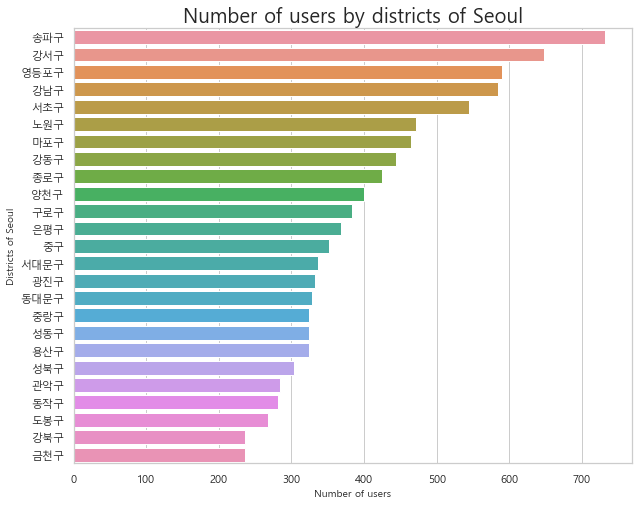

In [32]:
ax = sns.barplot(data=Y2, x="NUMPOINTS", y="SIG_KOR_NM",)
ax.set_title("Number of users by districts of Seoul",fontsize=20, position=(0.5, 1.0+0.05))
ax.set_xlabel("Number of users", fontsize=10)
ax.set_ylabel("Districts of Seoul", fontsize=10)

* 자치구별 어디아파 문진 이용자 수
> <b>송파구, 강서구, 영등포구, 강남구, 서초구</b> 순으로 이용자 수가 많으며, <b>강북구와 금천구</b>에서의 이용자 수가 <b>최저</b>임을 볼 수 있음.

<br>
<br>
<br>
<br>
<br>

# 어디아파 scoring + 질환 예측 모델

In [33]:
heart = pd.read_csv('./heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* <b>심근경색</b> 예측 모델에 사용된 데이터의 모습과 요약


* 변수 설명
> <b>Age</b> : 나이  
> <b>Sex</b> : 성별  
> <b>ca</b>: 과거 심장 스텐드 시술 수  
> <b>cp</b> : 가슴통증 강도
        >>Value 1 : typical angina  
        >>Value 2 : atypical angina  
        >>Value 3 : non-anginal pain  
        >>Value 4 : asymptomatic  
        
    > <b>trtbps</b> : 휴식기 혈압  
    > <b>chol</b> : 콜레스테롤  
    > <b>fbs</b> : 공복 혈당  
    > <b>rest_ecg</b> : 심전도
        >>Value 0 : normal  
        >>Value 1 : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
        >>Value 2 : showing probable or definite left ventricular hypertrophy by Estes' criteria  
        
    > <b>thalach</b> : 최대 심박수  
    > <b>output</b> :
        >>0 : 심근경색 위험 적음   
        >>1 : 심근경색 위험 높음

## 피쳐 선택

Text(0.5, 1.0, 'Distribution of outputs')

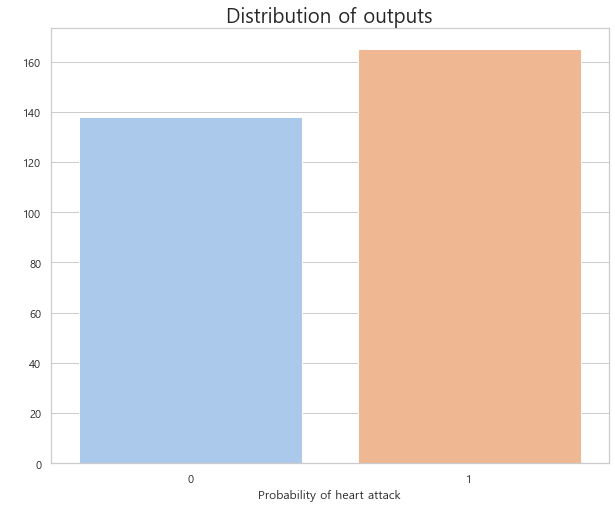

In [35]:
sns.countplot(x="output", data=heart).set(xlabel='Probability of heart attack',ylabel=' ')
plt.title('Distribution of outputs', size=20, position=(0.5, 1.0+0.05))

* 타겟(Y)값의 분포가 비교적 균등함을 알 수 있음.

In [36]:
#Chest Pain type is a column with categorical variables
name=['typical_angina','atypical_angina','non_anginal_pain','asymptomatic']

cd=pd.get_dummies(heart['cp'])
cd.columns=name

In [37]:
#Rest_ecg is a column with categorical variables
name=['normal',' having_abnormality','definite_left_ventricular_hypertrophy']

ad=pd.get_dummies(heart['restecg'])
ad.columns=name

In [38]:
#include in dataframe original and drop column cp
heart=heart.drop(labels=['cp','restecg'],axis=1)
heart=pd.concat([heart,cd,ad],axis=1)

## Pearson correlation

Text(0.5, 1.0, 'Correlation of parameters')

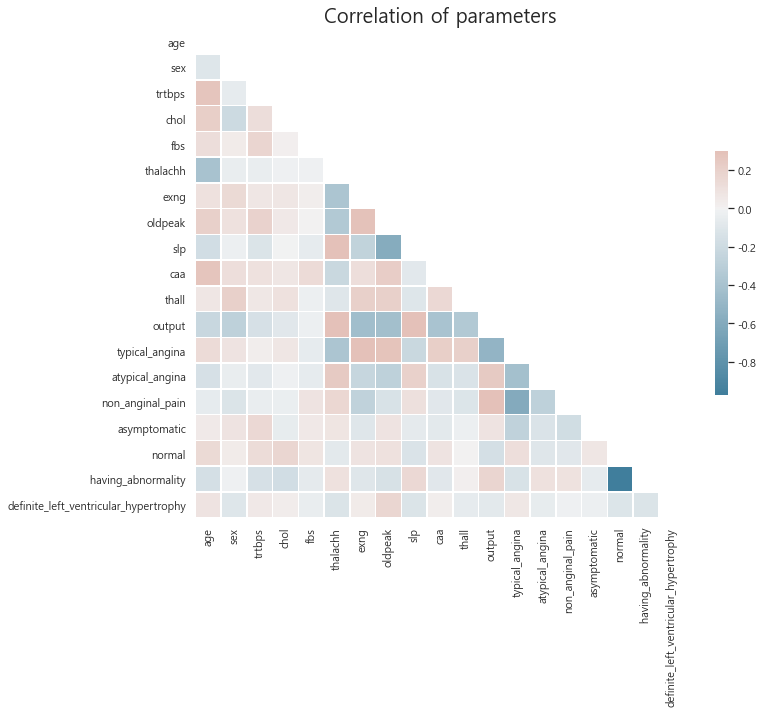

In [39]:
corr=heart.corr(method ='pearson')

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation of parameters', size=20, position=(0.5, 1.0+0.05))

## Spearman correlation

Text(0.5, 1.0, 'Correlation of parameters')

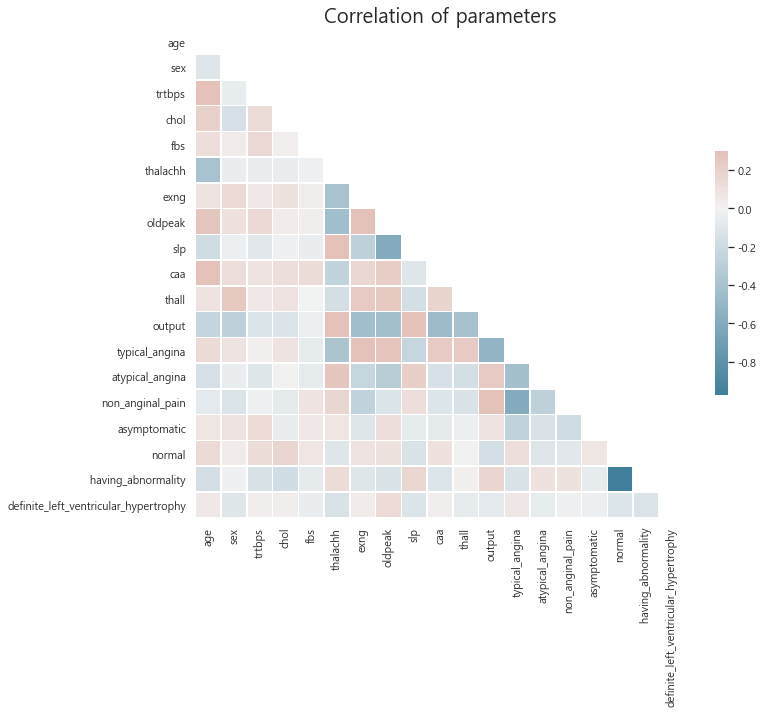

In [40]:
corr=heart.corr(method ='spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation of parameters', size=20, position=(0.5, 1.0+0.05))

* 스피어만 상관계수와 피어슨 상관계수가 일치하는 것으로 보아 해당 데이터들이 선형성을 갖는 단조로운 데이터임을 알 수 있고,  
<b>age, sex, trbps, chol</b> 그리고 <b>fbs</b> 와 같은 파라미터들은 심근경색과 큰 상관성이 없는 것을 알 수 있음.

<br>
<br>
<br>
<br>
<br>

## 심근경색 예측 모델 생성

In [41]:
y=heart['output']
X=heart.drop(labels=['age', 'sex', 'trtbps', 'chol','fbs','output'],axis=1)
X=X.drop(labels=['exng', 'typical_angina', 'atypical_angina', 'non_anginal_pain', 'asymptomatic', 'normal', ' having_abnormality', 'definite_left_ventricular_hypertrophy'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.15)

### 머신러닝 모델 예측 정확도 평가

* 사용된 예측 알고리즘
> Logistic Regression  
> Support Vector Machines  
> Decision Tree  
> Random Forrest

* 심근경색과 비교적 <b>상관성이 낮은 age, sex, trbps, chol, fbs</b>와  
<b>어디아파 문진으로 대체 가능한 변수 cp(가슴통증 강도)</b>를 제거한 나머지 변수들만 사용.

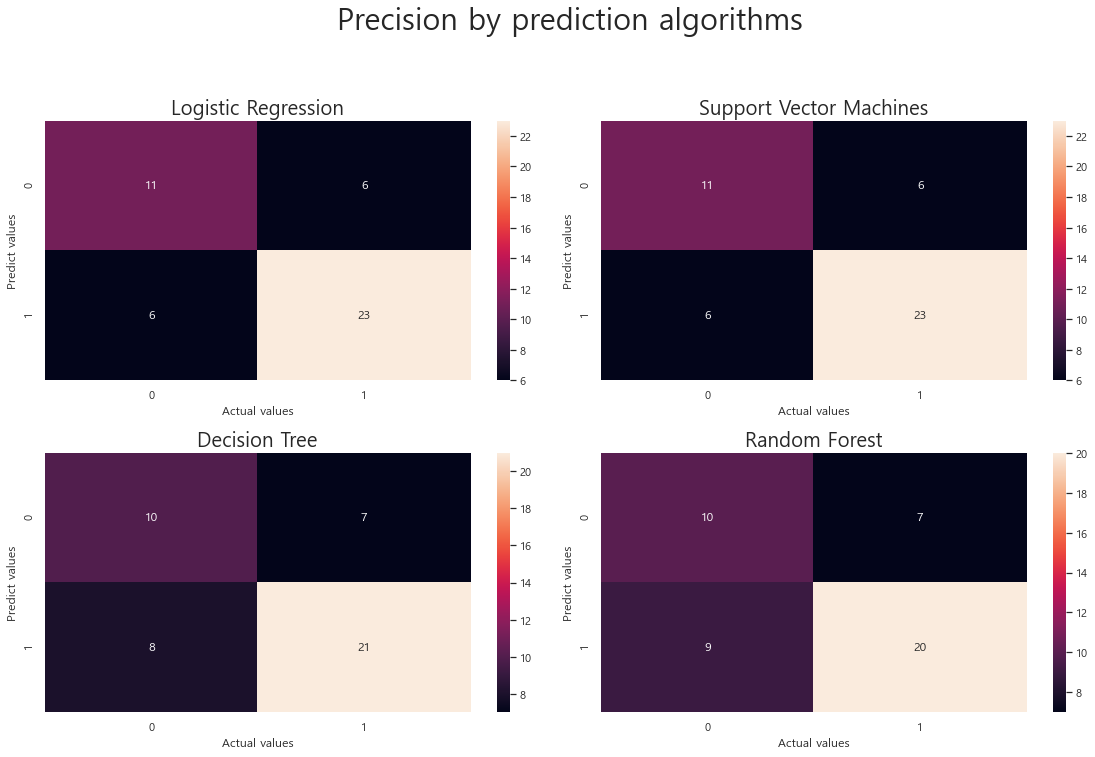

In [42]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred1 = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
# score는 accuracy(정확도)를 의미.



# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred2 = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)




# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred3 = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)




# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred4 = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)



fig10 = plt.figure(figsize=(16, 10))

ax10 = fig10.add_subplot(2,2,1)
cf_matrix1 = confusion_matrix(y_test, Y_pred1)
sns.heatmap(cf_matrix1, annot=True).set(xlabel='Actual values',ylabel='Predict values')
ax10.set_title('Logistic Regression', fontsize=20)

ax11 = fig10.add_subplot(2,2,2)
cf_matrix2 = confusion_matrix(y_test, Y_pred2)
sns.heatmap(cf_matrix2, annot=True).set(xlabel='Actual values',ylabel='Predict values')
ax11.set_title('Support Vector Machines', fontsize=20)

ax12 = fig10.add_subplot(2,2,3)
cf_matrix3 = confusion_matrix(y_test, Y_pred3)
sns.heatmap(cf_matrix3, annot=True).set(xlabel='Actual values',ylabel='Predict values')
ax12.set_title('Decision Tree', fontsize=20)

ax13 = fig10.add_subplot(2,2,4)
cf_matrix4 = confusion_matrix(y_test, Y_pred4)
sns.heatmap(cf_matrix4, annot=True).set(xlabel='Actual values',ylabel='Predict values')
ax13.set_title('Random Forest', fontsize=20)



fig10.suptitle('Precision by prediction algorithms', fontsize=30, position=(0.5, 1.0+0.05))
fig10.tight_layout()

plt.show()



* 모델의 정확도를 판단하는 척도로는
    > 정확도(Accuracy)  
    > 오차행렬(ConfusionMatrix)  
    > 정밀도(Precision)  
    > 재현율(Recall)  
    > F1 Score  
    > ROC AUC
    
 가 있지만, 의료 데이터 특성상 '실제 환자'를 '환자'라고 예측하는 확률이 중요하므로 <b>정밀도(Precision)</b>을 척도로 한다면,  
 (데이터가 적어, 실행할 때마다 달라질 수 있음).
 

<br>

* <b>로지스틱 회귀</b>는 로지스틱 함수를 이용하여 확률 추정으로 종속 변수와 하나 이상의 변수 사이의 관계를 측정하는 알고리즘.
> 정밀도 <b>약 85%</b>  
* <b>서포트 벡터 머신</b>은 분류 및 회귀 분석에 사용되는 알고리즘.
> 정밀도 <b>약 85%</b>  
* <b>의사결정 나무</b>는 변수들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내며, 그 모양이 '나무' 와 같다 해서 의사결정 나무라 불림.
> 정밀도 <b>약 85%</b>  
* <b>랜덤 포레스트</b>는 가장 인기 있는 모델 중 하나로, 분류, 회귀 등을 위한 앙상블 학습 방법으로, 훈련 시간에 다수의 의사결정 트리를 구성하고 개별 트리의 분류 또는 예측 모드인 클래스를 출력함.
> 정밀도 <b>약 90%</b>  

### 딥러닝 모델

In [43]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu',input_dim=X_train.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'), # relu 함수는 0 이상의 무한한 값을 가질 수 있음.
    keras.layers.Dense(1, activation='sigmoid'), # 마지막에 sigmoid 함수를 사용하는 이유는, 0과 1 사이의 값을 갖기 위함.
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint('./hearts_attack_model.h5', save_best_only=True)
]
model.fit(X_train,y_train,epochs=200,batch_size = 32,validation_split = 0.2,callbacks=callbacks)

Epoch 1/200
7/7 [==============================] - 1s 44ms/step - loss: 0.6782 - accuracy: 0.5463 - val_loss: 0.6515 - val_accuracy: 0.6923
Epoch 2/200
7/7 [==============================] - 0s 15ms/step - loss: 0.6303 - accuracy: 0.7610 - val_loss: 0.6221 - val_accuracy: 0.8077
Epoch 3/200
7/7 [==============================] - 0s 15ms/step - loss: 0.6003 - accuracy: 0.7659 - val_loss: 0.5923 - val_accuracy: 0.7692
Epoch 4/200
7/7 [==============================] - 0s 15ms/step - loss: 0.5671 - accuracy: 0.7805 - val_loss: 0.5595 - val_accuracy: 0.8077
Epoch 5/200
7/7 [==============================] - 0s 14ms/step - loss: 0.5352 - accuracy: 0.7902 - val_loss: 0.5277 - val_accuracy: 0.8269
Epoch 6/200
7/7 [==============================] - 0s 15ms/step - loss: 0.5047 - accuracy: 0.7902 - val_loss: 0.4998 - val_accuracy: 0.8462
Epoch 7/200
7/7 [==============================] - 0s 15ms/step - loss: 0.4739 - accuracy: 0.8049 - val_loss: 0.4812 - val_accuracy: 0.8462
Epoch 8/200
7/7 [===

7/7 [==============================] - 0s 7ms/step - loss: 0.2369 - accuracy: 0.8976 - val_loss: 0.6709 - val_accuracy: 0.8077
Epoch 60/200
7/7 [==============================] - 0s 9ms/step - loss: 0.2332 - accuracy: 0.8976 - val_loss: 0.6835 - val_accuracy: 0.8077
Epoch 61/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2317 - accuracy: 0.9024 - val_loss: 0.6737 - val_accuracy: 0.8077
Epoch 62/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.9073 - val_loss: 0.6821 - val_accuracy: 0.8077
Epoch 63/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2301 - accuracy: 0.9024 - val_loss: 0.6837 - val_accuracy: 0.8077
Epoch 64/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2282 - accuracy: 0.8976 - val_loss: 0.6841 - val_accuracy: 0.8077
Epoch 65/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2268 - accuracy: 0.9073 - val_loss: 0.6903 - val_accuracy: 0.8077
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.9366 - val_loss: 0.8948 - val_accuracy: 0.7885
Epoch 118/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1677 - accuracy: 0.9366 - val_loss: 0.9094 - val_accuracy: 0.8077
Epoch 119/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1787 - accuracy: 0.9317 - val_loss: 0.8975 - val_accuracy: 0.7692
Epoch 120/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1721 - accuracy: 0.9268 - val_loss: 0.8919 - val_accuracy: 0.7885
Epoch 121/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1664 - accuracy: 0.9268 - val_loss: 0.9342 - val_accuracy: 0.7885
Epoch 122/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1676 - accuracy: 0.9415 - val_loss: 0.9461 - val_accuracy: 0.7885
Epoch 123/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1659 - accuracy: 0.9268 - val_loss: 0.9270 - val_accuracy: 0.7885
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.1276 - accuracy: 0.9463 - val_loss: 1.1696 - val_accuracy: 0.7692
Epoch 176/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1230 - accuracy: 0.9659 - val_loss: 1.1585 - val_accuracy: 0.7885
Epoch 177/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1297 - accuracy: 0.9366 - val_loss: 1.1639 - val_accuracy: 0.7885
Epoch 178/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1316 - accuracy: 0.9366 - val_loss: 1.1930 - val_accuracy: 0.8077
Epoch 179/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1223 - accuracy: 0.9561 - val_loss: 1.1796 - val_accuracy: 0.7885
Epoch 180/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1230 - accuracy: 0.9463 - val_loss: 1.1902 - val_accuracy: 0.7885
Epoch 181/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1200 - accuracy: 0.9561 - val_loss: 1.2133 - val_accuracy: 0.8077
Epoch 182/200
7/7 [========

* 심근경색과 비교적 <b>상관성이 낮은 age, sex, trbps, chol, fbs</b>와  
<b>어디아파 문진으로 대체 가능한 변수 cp(가슴통증 강도)</b>를 제거한 나머지 변수들만 사용.

### 딥러닝 모델 예측 정확도 평가

[Text(0.5, 46.5, 'Actual values'), Text(64.5, 0.5, 'Predict values')]

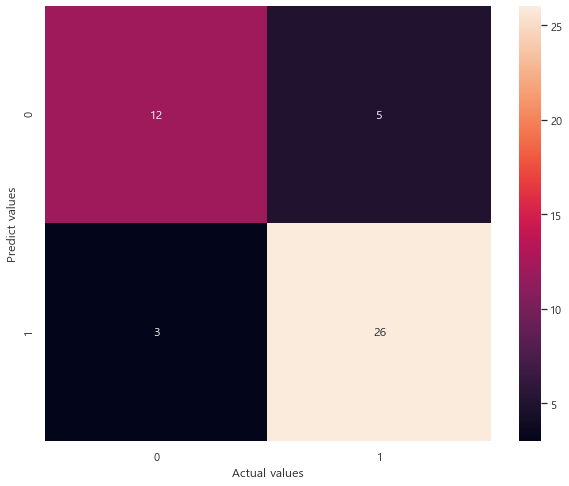

In [44]:
model = keras.models.load_model('./hearts_attack_model.h5')
y_predict=(model.predict(X_test) > 0.5).astype("int32")
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot=True).set(xlabel='Actual values',ylabel='Predict values')

* 딥러닝 모델의 정밀도는 <b>약 92%</b>

<br>
<br>
<br>
<br>
<br>

## Dummy 문진 결과 모델 적용

* 미약하게나마, <b>딥러닝 예측 모델의 정밀도</b>가 서포트 벡터 머신의 모델 정밀도보다 <b>조금 더 높은</b> 경우가 많아 딥러닝 모델을 사용

In [45]:
dummy = pd.read_csv("./문진결과심근경색.csv", encoding='euc-kr')

In [46]:
import random
random.seed(5)
dummy['thalachh'] = 0
dummy['thalachh'] = dummy['thalachh'].apply(lambda x : random.randrange(100,201))
dummy['oldpeak'] = 0
dummy['oldpeak'] = dummy['oldpeak'].apply(lambda x : random.uniform(0, 2.2))
dummy['slp'] = 0
dummy['slp'] = dummy['slp'].apply(lambda x : random.choice([0, 1, 2]))
dummy['thall'] = 0
dummy['thall'] = dummy['thall'].apply(lambda x : random.choice([1, 2, 3]))
dummy['caa'] = 0
dummy['caa'] = dummy['caa'].apply(lambda x : random.choices([0, 1, 2, 3, 4], weights=(95,5,3,2,1))[0])
dummy = dummy.set_index('user_id')

In [47]:
dummy.head()

,score,thalachh,oldpeak,slp,thall,caa
user_id,,,,,,
9,20.0,179,0.646475,2,1,0
50,30.0,132,2.080205,0,2,0
61,15.0,194,1.429323,0,3,0
92,35.0,145,1.277454,0,3,0
119,25.0,188,0.025477,2,1,0


* 가슴통증 증상을 호소하는 10,000명 중 예측 질환이 <b>급성 심근경색증</b>인 241명의 데이터에, 모델에서 사용된 변수를 랜덤 추출한 모습

In [48]:
dummy_ml = dummy.drop(['score'], axis=1)

In [49]:
dummy_X = scaler.fit_transform(dummy_ml)
dummy['out'] = (model.predict(dummy_X) > 0.5).astype("int32")

In [50]:
dummy = dummy.drop(['thalachh', 'oldpeak', 'slp', 'thall', 'caa'], axis=1)

In [51]:
dummy['mixed_score'] = 0
for i in range(0, len(dummy)) :
    if dummy.iloc[i,1] == 1 :
        dummy.iloc[i,2] = dummy.iloc[i,0] * 2
    else :
        dummy.iloc[i,2] = dummy.iloc[i,0] * 0.2
        
dummy

,score,out,mixed_score
user_id,,,
9,20.0,1,40.0
50,30.0,0,6.0
61,15.0,0,3.0
92,35.0,0,7.0
119,25.0,1,50.0
...,...,...,...
9866,30.0,1,60.0
9867,25.0,1,50.0
9886,30.0,1,60.0


* Dummy 데이터를 심근경색 예측 모델에 적용한 모습
> score : 어디아파 기존 scoring 시스템 산출 결과  
> out : 예측 모델 결과  
> mixed_score : 예측 모델 결과에 따라, score에 가중치를 주어 새로 산출한 점수  

* 실제 문진 데이터와 기타 측정 및 임상 데이터를 결합한다면 위와 같이 모델과 기존 문진 점수를 결합해 더욱 <b>보완된 예측 모델</b>을 만들 수 있을 것으로 보임.